<div style="text-align: center;">
  <img src="https://github.com/datax-official/datax-official/blob/main/assests/Data%20Analysis%20class%20bammer%20(1).png?raw=true" alt="Data X Banner" />
</div>

<h1 style="font-family:verdana;"> <center>Coffee Shop Sales Analysis</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Turning data into Insights</center></p>

***


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_excel('/kaggle/input/coffee-sales/Coffee Shop Sales.xlsx')

In [58]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [59]:
missing = df.isnull().sum()
missing

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [60]:
df.shape

(149116, 11)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [62]:
df.duplicated().any()

False

In [63]:
# see unique values in each column

# 1- create new data frame with number of unique value in each column
columnValue = df.nunique().reset_index()

# 2- rename column name 
columnValue.rename(columns = {"index" : "Column _name", 0 : "Uniue values"}, inplace = True)

# 3- see columns and number of unique values of each
columnValue

,Column _name,Uniue values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [64]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [65]:
# see quick info of categorical data

df.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [66]:
# drop some columns such as "product_id", "transaction_id" and "store_id"

#data.drop(columns = ["transaction_id", "store_id", "product_id"], inplace = True)

# Univarient Analysis and Visualization

In [67]:
df['transaction_time'].head(10)

0    07:06:11
1    07:08:56
2    07:14:04
3    07:20:24
4    07:22:41
5    07:22:41
6    07:25:49
7    07:33:34
8    07:39:13
9    07:39:34
Name: transaction_time, dtype: object

In [68]:
# Convert to string if necessary
df['transaction_time'] = df['transaction_time'].astype(str)

# Attempt to parse with `errors='coerce'` to handle inconsistent formats
df['transaction_time'] = pd.to_datetime(df['transaction_time'], errors='coerce')

# Check for any parsing issues (e.g., rows where parsing failed)
print(df[df['transaction_time'].isna()])


/tmp/ipykernel_627/1848569873.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transaction_time'] = pd.to_datetime(df['transaction_time'], errors='coerce')


Empty DataFrame
Columns: [transaction_id, transaction_date, transaction_time, transaction_qty, store_id, store_location, product_id, unit_price, product_category, product_type, product_detail]
Index: []


In [69]:
# create function to visualized categorical column using count plot

def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    5) top parameter i use it to specify indexes i want to see it
    """
    if x_axis: # if we neet to visualized in x-axis
        order = df[x_axis].value_counts().iloc[:top].index
        
    else : # if we neet to visualized in y-axis
        order = df[y_axis].value_counts().iloc[:top].index
        
    graph = sns.countplot(x = x_axis, y = y_axis, data = df, hue = hue, order = order, palette = "RdBu")
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [70]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name, explodeIndex = None):
    """
    1) input : column name, column data type must be object or categorical
    2) explodeIndex, is the index i need to explode it 
    2) output : circle chart that shows size of each unique values and percentage 
    """
    # Create explode list with zeros of size equal to the number of unique values
    explodeList = [0] * df[column_name].nunique()
    
    # Check and set explodeIndex value 
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1
     # Create pie plot
    plt.pie(df[column_name].value_counts(), labels = df[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

In [71]:
# Creating Sales Columns 
df['sales'] = df['transaction_qty'] * df['unit_price']

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  sales             149116 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 13.7+ MB


In [73]:
#convert transaction time to timedelta
df['transaction_time'] = pd.to_timedelta(df['transaction_time'].dt.time.astype(str))

In [74]:
df['datetime'] = df['transaction_date'] + df['transaction_time']

# Extract some information such as year, month, day

In [75]:
# add new column year
df["year"] = df["transaction_date"].dt.year

# add new column month
df["month"] = df["transaction_date"].dt.month_name()

# add new column day
df["day"] = df["transaction_date"].dt.day_name()

In [76]:
df.sample(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime,year,month,day
10725,10755,2023-01-19,0 days 14:48:27,1,3,Astoria,49,3.0,Tea,Brewed Black tea,English Breakfast Lg,3.0,2023-01-19 14:48:27,2023,January,Thursday
30483,30540,2023-02-23,0 days 11:59:29,1,5,Lower Manhattan,28,2.0,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,2.0,2023-02-23 11:59:29,2023,February,Thursday
14299,14329,2023-01-26,0 days 06:49:02,1,5,Lower Manhattan,9,22.5,Coffee beans,Organic Beans,Organic Decaf Blend,22.5,2023-01-26 06:49:02,2023,January,Thursday


# Discovering Unique in columns

In [77]:
# see unique values of year column

df["year"].unique()

array([2023], dtype=int32)

In [78]:
# see unique values of month column

df["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

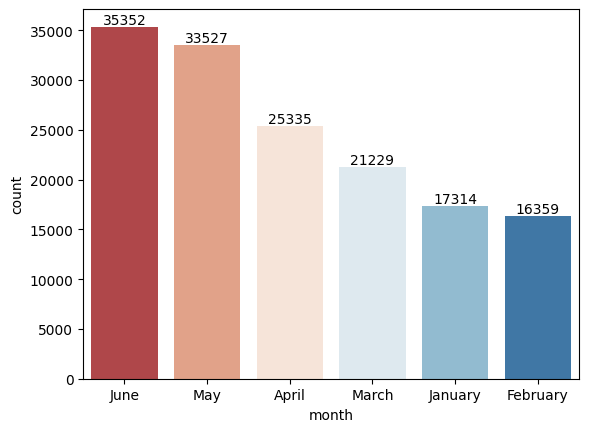

In [79]:
# see number of transaction in each month

count_plot(x_axis = "month") #called the function i created above

In [80]:
df["day"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

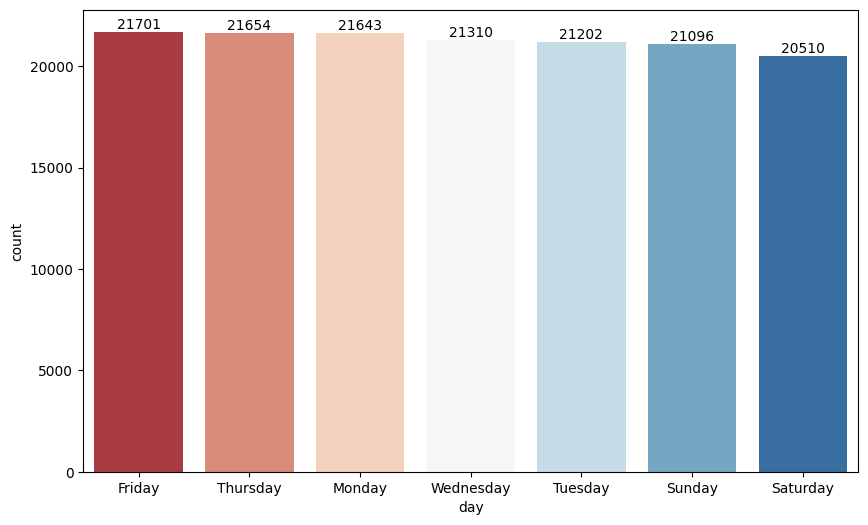

In [81]:
plt.figure(figsize=(10,6))

count_plot(x_axis= "day")

In [82]:
# Extract the hour from the original transaction_time before conversion to Timedelta
df['hour'] = df['transaction_time'].dt.components['hours']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


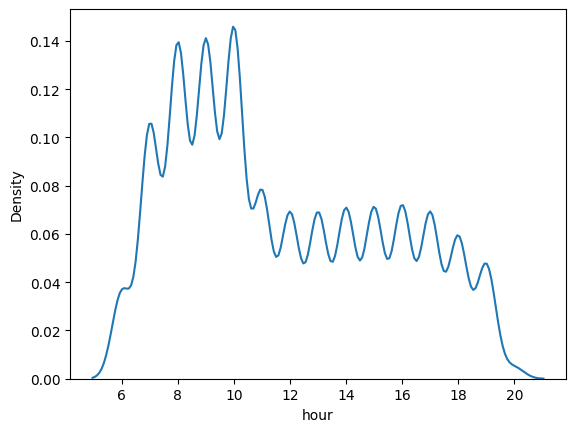

In [83]:
# see distribution

sns.kdeplot(df["hour"])
plt.show()

## Discovering Transaction quantity column

In [84]:
# see unique values 

df["transaction_qty"].unique()

array([2, 1, 3, 4, 8, 6])

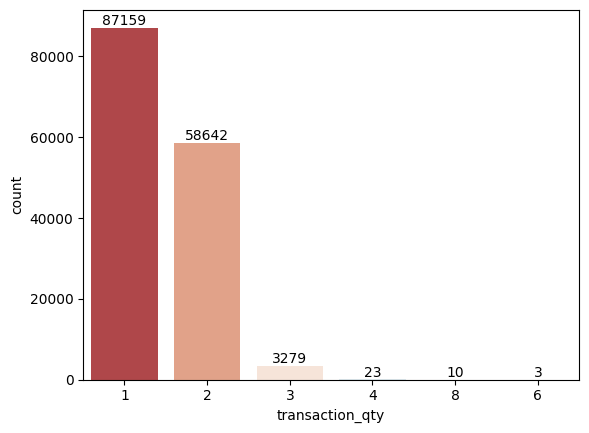

In [85]:
# see number of sales quantity  

count_plot(x_axis = "transaction_qty") # call function i create it in cell 12

In [86]:
df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

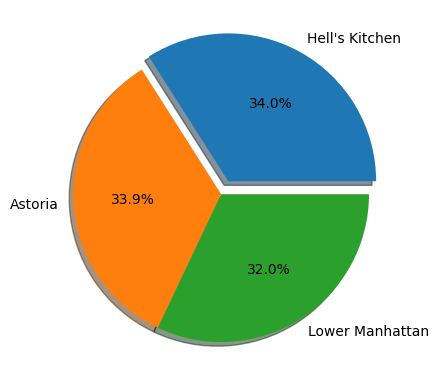

In [87]:
# see number of sales in each store

pie_plot(column_name = "store_location", explodeIndex = 0)

## Discovering price columns

In [88]:
# see unique values

df["unit_price"].unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

<Axes: ylabel='unit_price'>

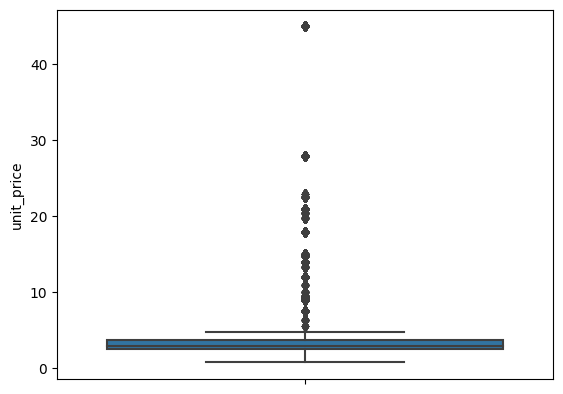

In [89]:
sns.boxplot(y= 'unit_price', data = df)

### 🧩 One might assume the presence of outliers, but such variations are expected in different types of coffee

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


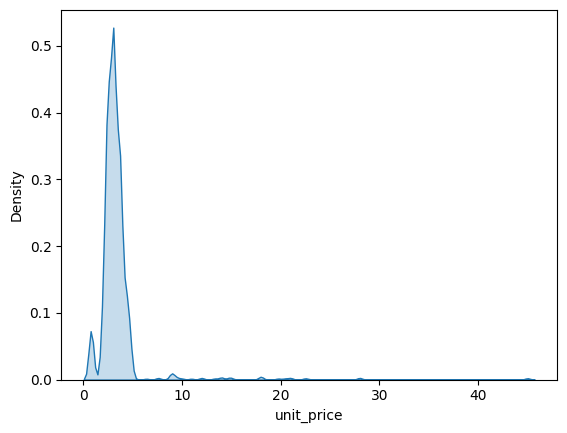

In [90]:
# see distribution

sns.kdeplot(x = df["unit_price"], fill = True)
plt.show()

🛑📊 We can see :

Price distribution is positively skewed, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices

# Product Category

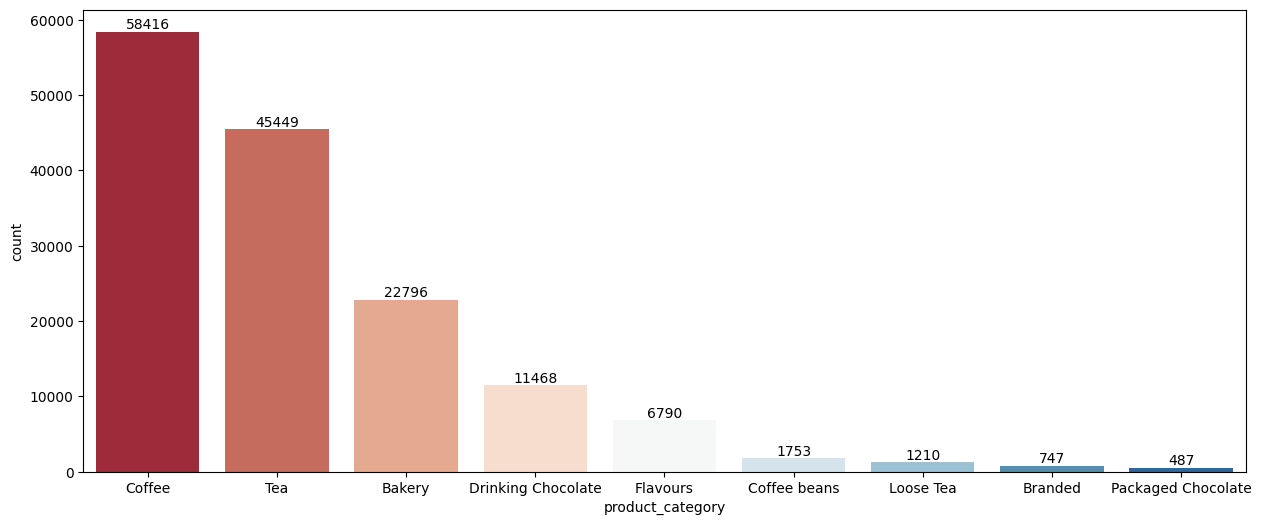

In [91]:
# see most common category

# set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 12
count_plot(x_axis = "product_category")  

🛑📊 We can see :

it's evident that the three stores offer a wide range of services.
Coffee stands as the best-selling product.
Tea also exhibits a high sales rate.

Columns Insights📊📉📈¶ <br>
Year, Sales exclusively from 2023. <br>
Month, Most sales within a six-month period <br>
Hour, Most sales were from 8 am to 11 pm <br>
Transaction quantity, Most sales were singles followed by 2 lots <br>
Stores, The sales rates of the three stores were similar, with the most significant difference observed at the Hell's Kitchen store <br>
Unit price, Price distribution is positively skewed, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices <br>
Category :
it's evident that the three stores offer a wide range of services. <br>
Coffee stands as the best-selling product. <br>
Tea also exhibits a high sales rate. <br>

product type : <br>
In the Bakery category, the most sold item is the scone <br>
In the Branded category, the best-selling item is Housewares <br>
In the Coffee category, the best-selling item is Gourmet brewed coffee <br>
In the Coffee beans category, the best-selling item is Organic Beans <br>
The Drinking Chocolate category solely offers hot chocolate <br>
Regular syrup are the top-selling items in the Flavours category <br>
In the Loose Tea category, the best-selling item is Chai tea <br>
In the Packaged Chocolate category, the best-selling item is Drinking Chocolate<br>
In the Tea category, the best-selling item is Brewed Chai tea

In [92]:
df_location = df.groupby('store_location').agg({
    'sales': 'sum',
    'transaction_id': 'count'
})
df_location

,sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [93]:
daily_sales_by_location = df.groupby(['transaction_date','store_location'])['sales'].sum().unstack()
daily_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


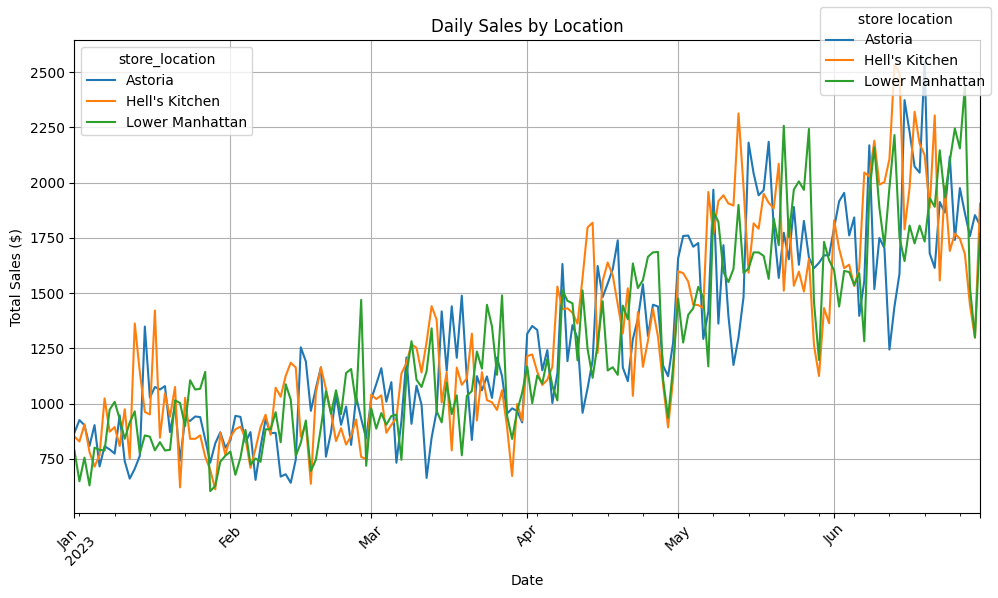

In [94]:
daily_sales_by_location.plot(figsize=(10,6), title="Daily Sales by Location")

plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.figlegend(title = 'store location')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


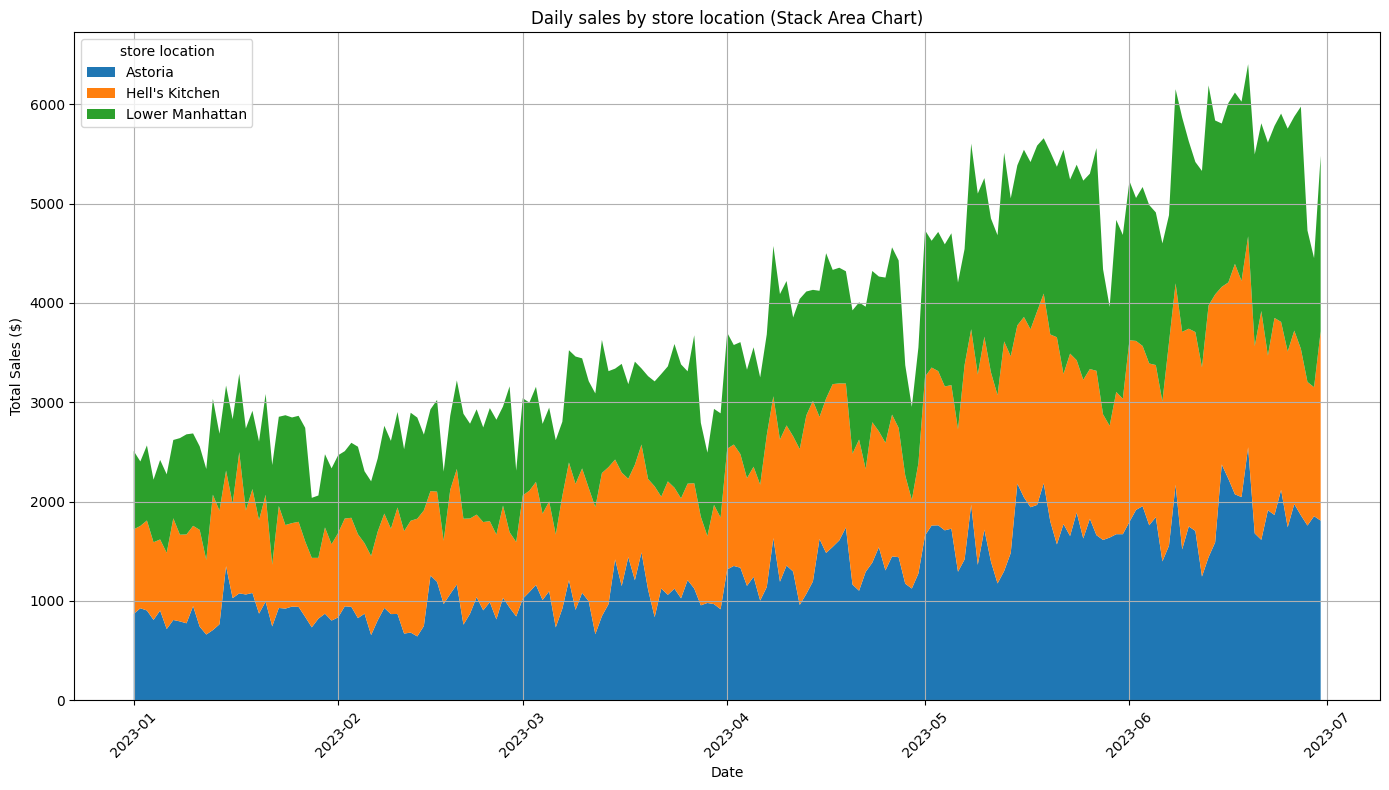

In [95]:
plt.figure(figsize=(14,8))

plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels=daily_sales_by_location.columns)
plt.title('Daily sales by store location (Stack Area Chart)')
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.legend(title = 'store location', loc = 'upper left')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [96]:
df.head(1)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime,year,month,day,hour
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11,2023,January,Sunday,7


In [97]:
daily_sales = df.groupby('transaction_date') ['sales'].sum().reset_index()
df['day_of_week'] = df['datetime'].dt.day_name()

In [98]:
weekly_sales = df.groupby('transaction_date') ['day_of_week'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

In [99]:
df['Month'] = df['datetime'].dt.to_period('M')

monthly_sales = df.groupby('Month') ['sales'].sum().reset_index()

In [100]:
daily_sales, weekly_sales, monthly_sales

(    transaction_date    sales
 0         2023-01-01  2508.20
 1         2023-01-02  2403.35
 2         2023-01-03  2565.00
 3         2023-01-04  2220.10
 4         2023-01-05  2418.85
 ..               ...      ...
 176       2023-06-26  5875.90
 177       2023-06-27  5975.65
 178       2023-06-28  4728.90
 179       2023-06-29  4450.75
 180       2023-06-30  5481.32
 
 [181 rows x 2 columns],
   transaction_date day_of_week
 0           Monday         NaN
 1          Tuesday         NaN
 2        Wednesday         NaN
 3         Thursday         NaN
 4           Friday         NaN
 5         Saturday         NaN
 6           Sunday         NaN,
      Month      sales
 0  2023-01   81677.74
 1  2023-02   76145.19
 2  2023-03   98834.68
 3  2023-04  118941.08
 4  2023-05  156727.76
 5  2023-06  166485.88)

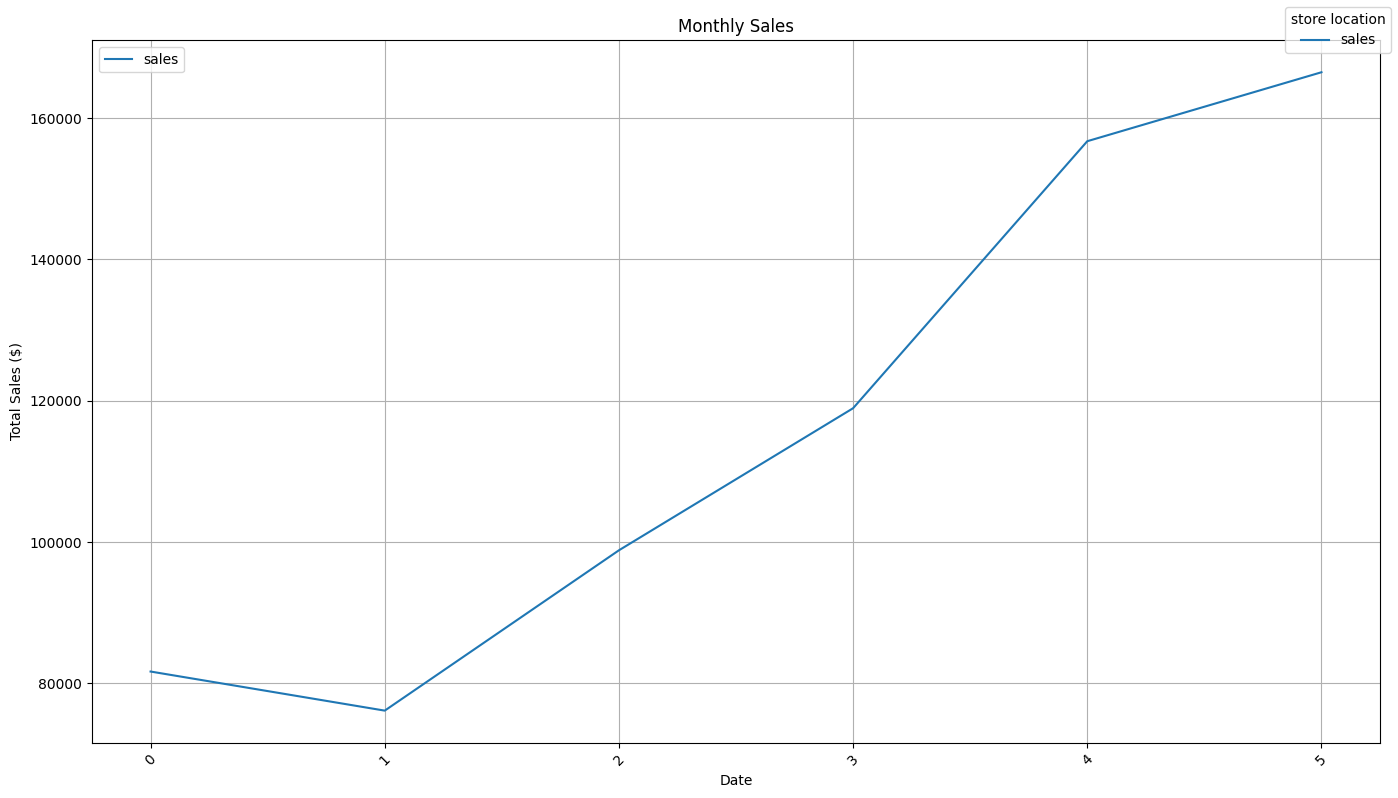

In [101]:
monthly_sales.plot(figsize=(14,8), title="Monthly Sales")

plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.figlegend(title = 'store location')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


In [102]:
weekly_sales = df.groupby(['day_of_week', 'store_location']) ['sales'].sum().unstack()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_sales = weekly_sales.reindex(days_order)

weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Monday,33928.29,33389.51,34359.48
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82
Thursday,34140.37,33468.06,33159.35
Friday,33472.75,34743.18,33157.07
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50


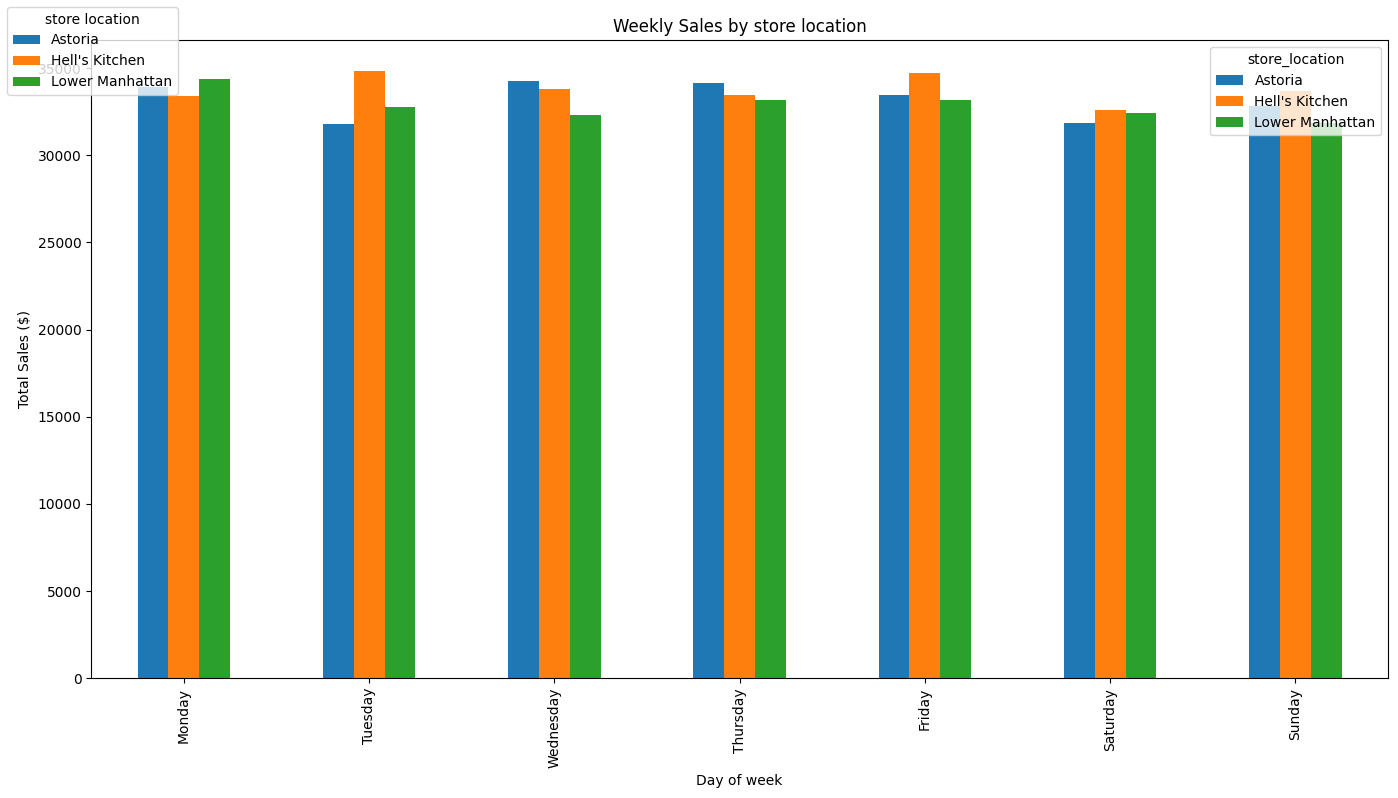

In [103]:
weekly_sales[['Astoria', 'Hell\'s Kitchen', 'Lower Manhattan']].plot(kind='bar' , figsize=(14,8))

plt.xlabel("Day of week")
plt.ylabel("Total Sales ($)")
plt.title('Weekly Sales by store location')
plt.figlegend(title = 'store location', loc = 'upper left')

plt.tight_layout()
plt.show()

In [104]:
df_category = df.groupby('product_category').agg({
    'sales': 'sum',
    'transaction_id': 'count'
}).sort_values('sales', ascending=False)
df_category

,sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


In [105]:
hourly_sales_by_product = df.groupby(['hour', 'product_category'])['sales'].sum().unstack()

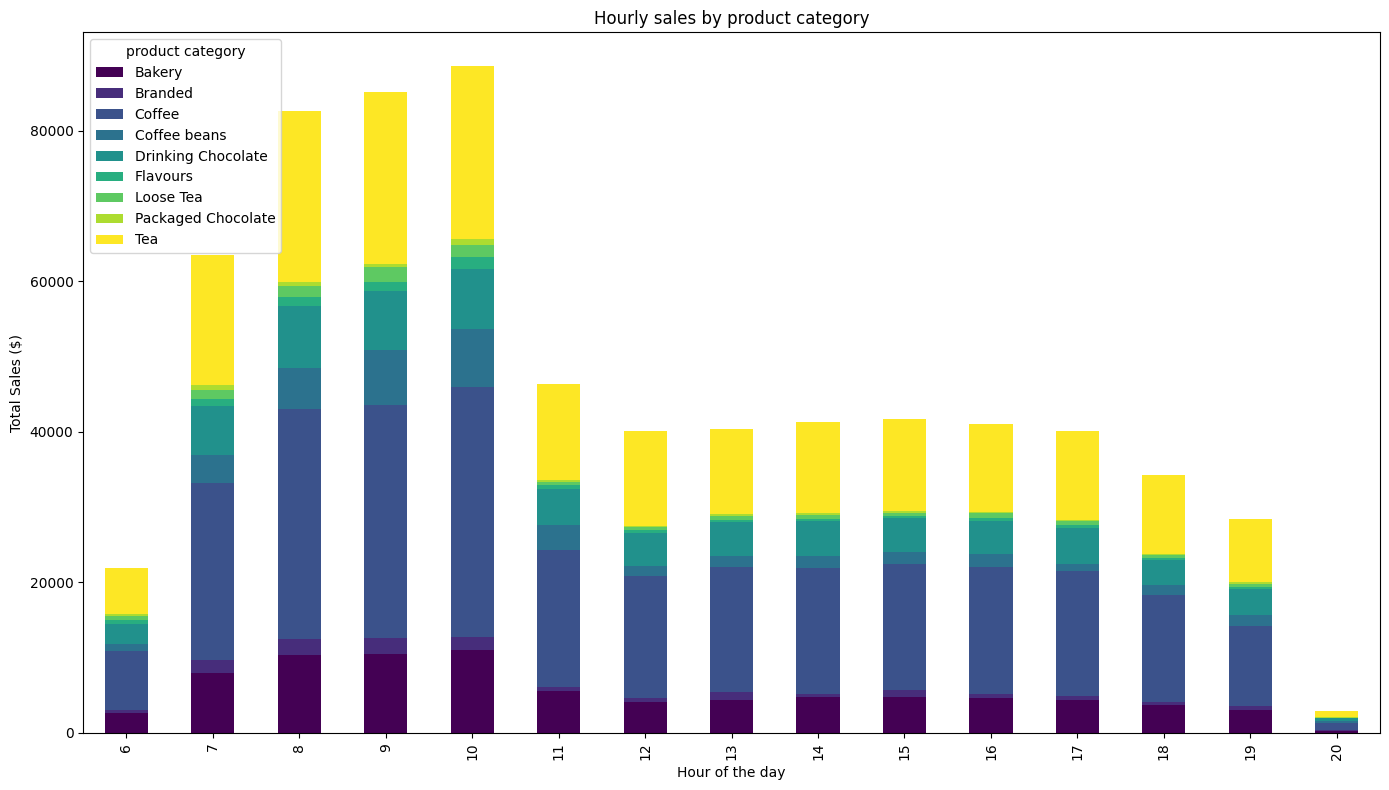

In [106]:
hourly_sales_by_product.plot(kind='bar', stacked=True, figsize=(14,8), colormap='viridis')

plt.title('Hourly sales by product category')

plt.xlabel("Hour of the day")
plt.ylabel("Total Sales ($)")
plt.legend(title = 'product category', loc = 'upper left')

plt.tight_layout()
plt.show()

# Average sale

In [107]:
df_category['avg_sales'] = df_category['sales'] / df_category['transaction_id']
df_category

,sales,transaction_id,avg_sales
product_category,,,
Coffee,269952.45,58416,4.621207
Tea,196405.95,45449,4.321458
Bakery,82315.64,22796,3.610969
Drinking Chocolate,72416.00,11468,6.314615
Coffee beans,40085.25,1753,22.866657
Branded,13607.00,747,18.215529
Loose Tea,11213.60,1210,9.267438
Flavours,8408.80,6790,1.238409
Packaged Chocolate,4407.64,487,9.050595


In [108]:
sales_by_product = df.groupby('product_type').agg({
    'sales': 'sum',
    'transaction_id': 'count'
}).sort_values('sales', ascending=False)
sales_by_product

,sales,transaction_id
product_type,,
Barista Espresso,91406.20,16403
Brewed Chai tea,77081.95,17183
Hot chocolate,72416.00,11468
Gourmet brewed coffee,70034.60,16912
Brewed Black tea,47932.00,11350
Brewed herbal tea,47539.50,11245
Premium brewed coffee,38781.15,8135
Organic brewed coffee,37746.50,8489
Scone,36866.12,10173


In [109]:
product_sales_df = df.groupby(['product_category', 'product_type']) ['sales'].sum().reset_index()
product_sales_df

,product_category,product_type,sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


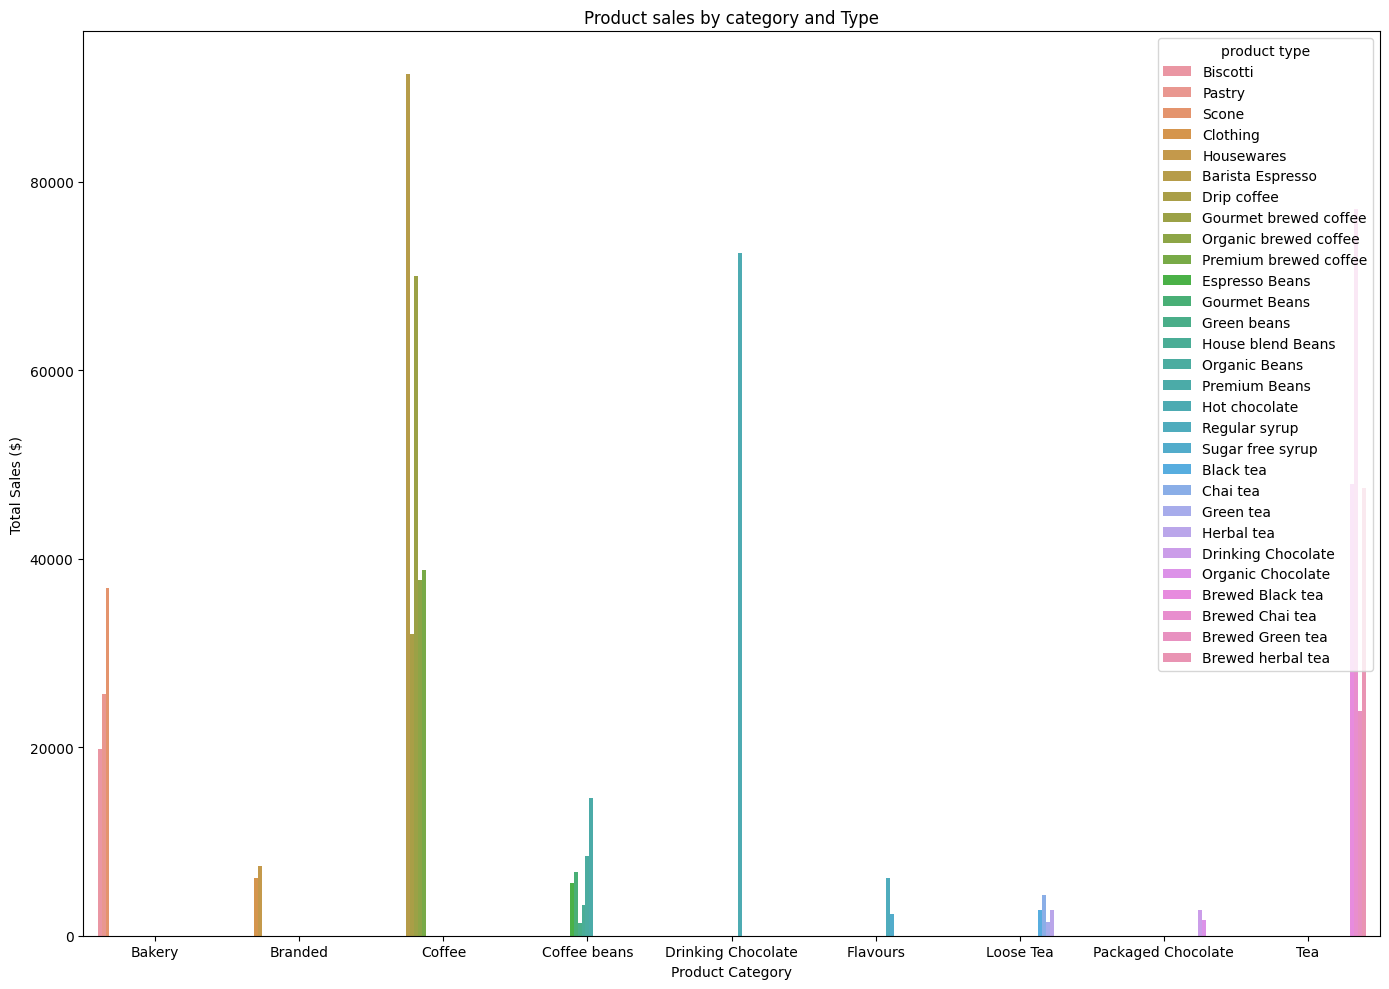

In [113]:
plt.figure(figsize=(14,10))
sns.barplot(data= product_sales_df, x='product_category',y='sales', hue='product_type')

plt.title('Product sales by category and Type')

plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.legend(title = 'product type', loc = 'upper right')

plt.tight_layout()
plt.show()

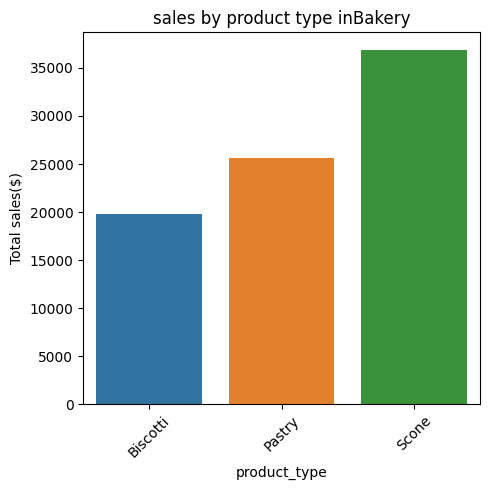

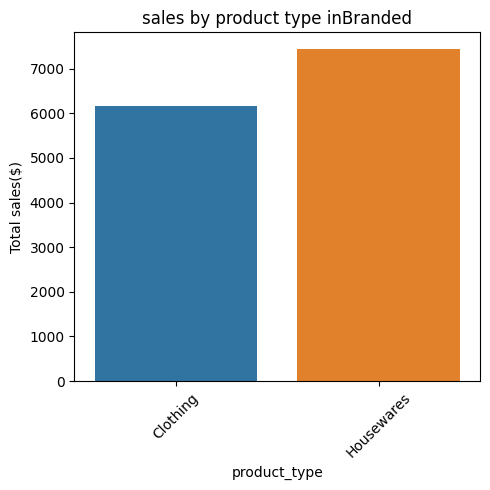

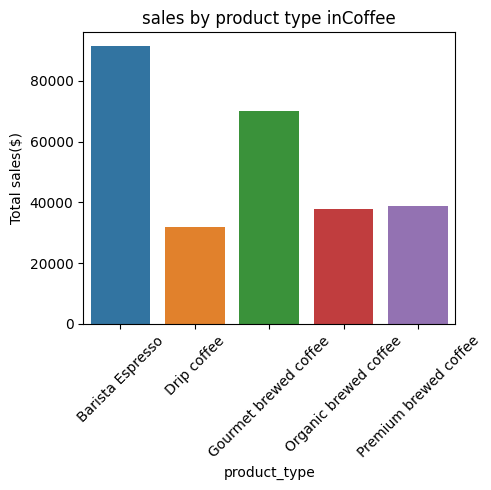

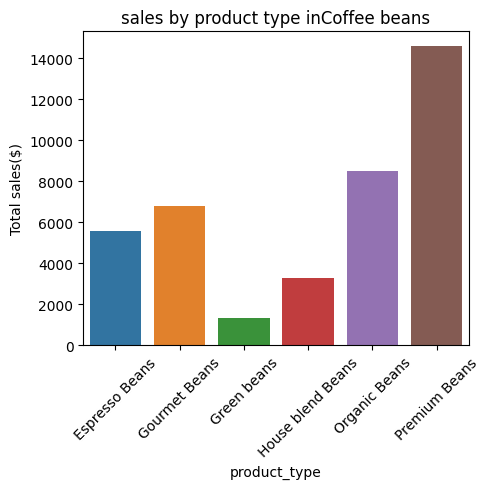

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


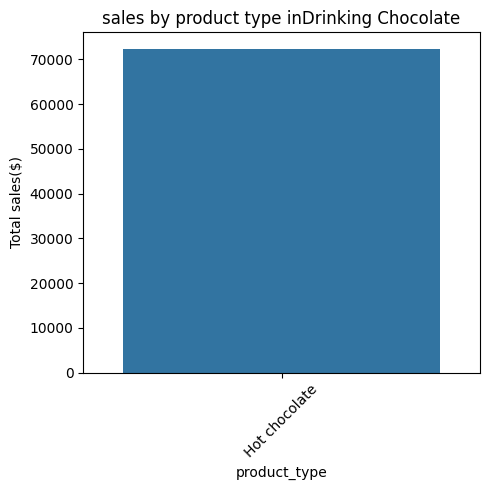

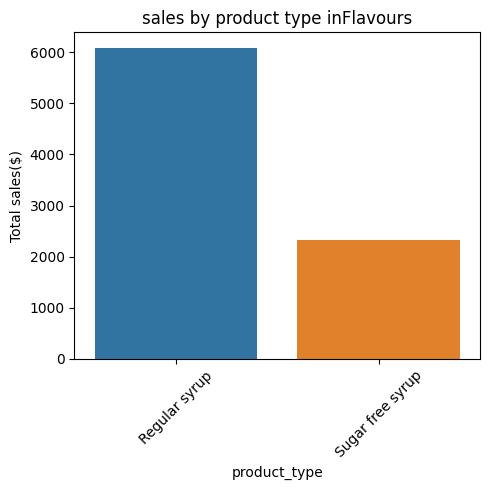

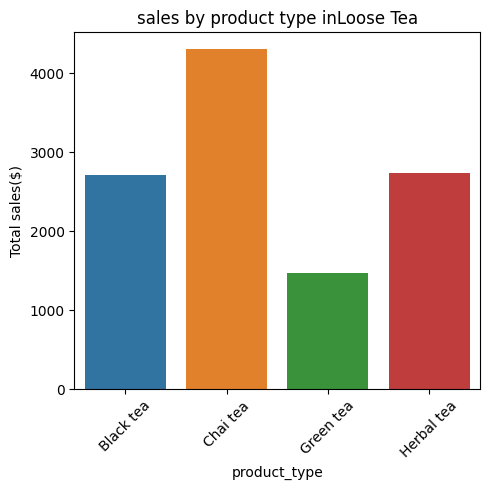

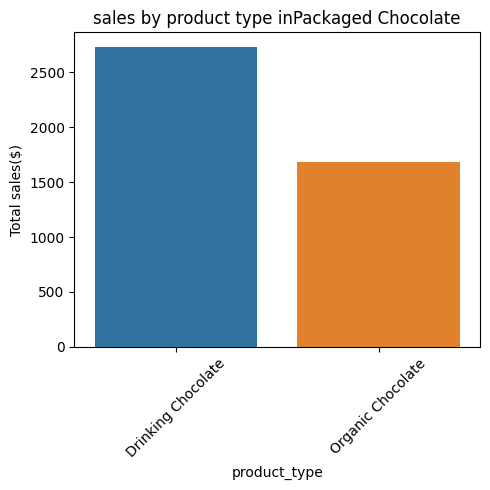

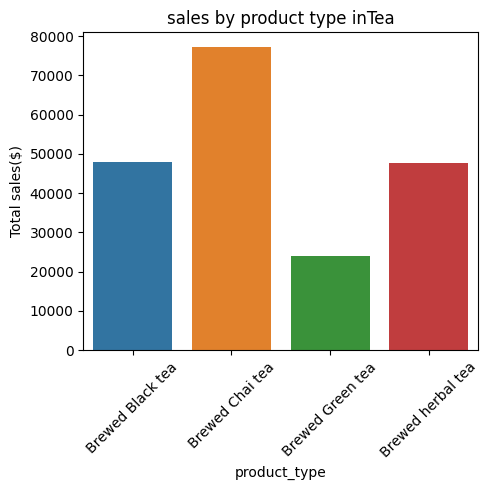

In [116]:
categories = product_sales_df['product_category'].unique()
for category in categories:
    plt.figure(figsize=(5,5))
    category_data = product_sales_df[product_sales_df['product_category'] == category]
    sns.barplot(data = category_data, x='product_type', y='sales')
    #add labels and title
    plt.title(f'sales by product type in{category}')
    plt.xlabel('product_type')
    plt.ylabel('Total sales($)')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

In [118]:
hourly_sales_by_location = df.groupby(['store_location', 'hour']) ['sales'].sum().reset_index()

In [119]:
hourly_sales_by_location

,store_location,hour,sales
0,Astoria,7,19028.80
1,Astoria,8,22805.90
2,Astoria,9,23183.57
3,Astoria,10,24426.12
4,Astoria,11,15498.13
5,Astoria,12,15681.20
6,Astoria,13,15947.87
7,Astoria,14,15175.27
8,Astoria,15,15651.95
9,Astoria,16,16110.85


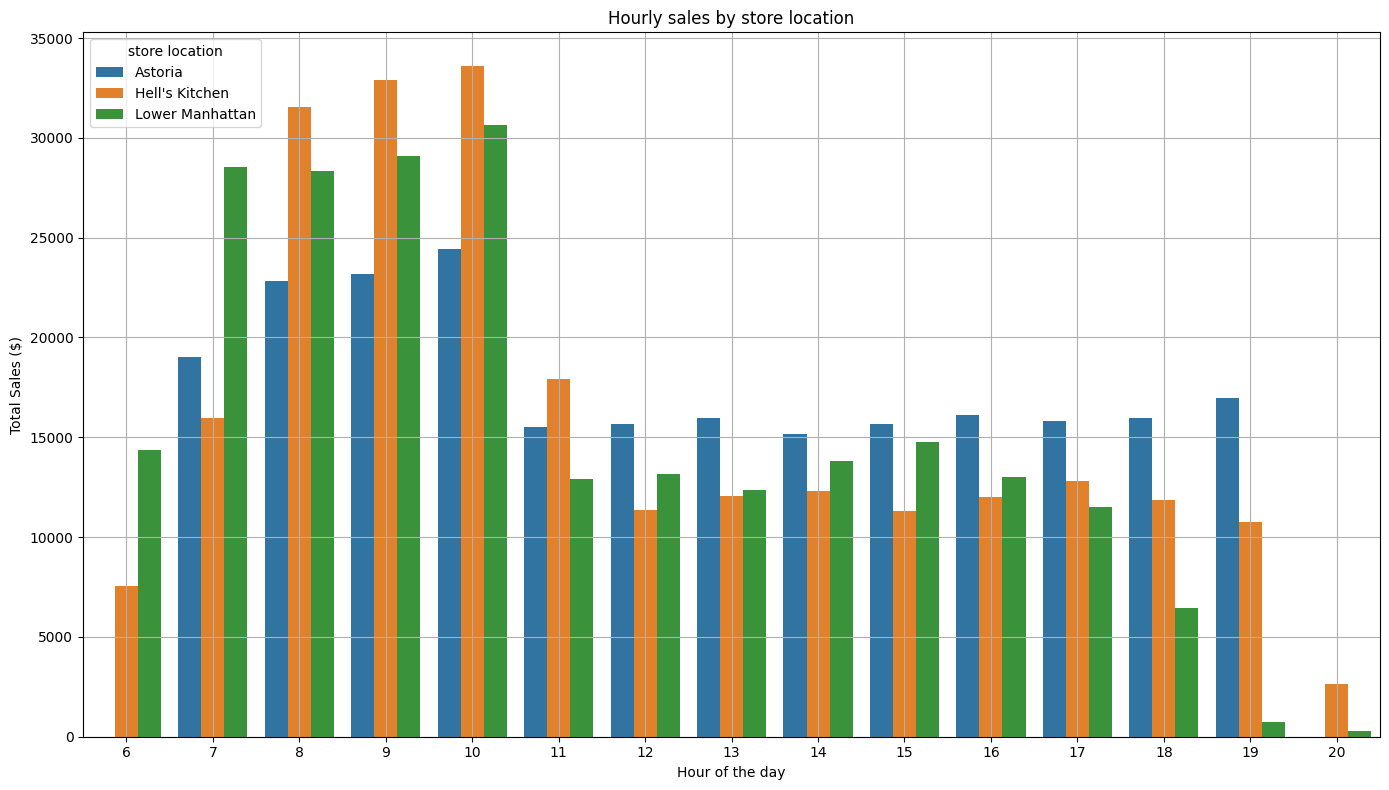

In [120]:
plt.figure(figsize=(14,8))
sns.barplot(data = hourly_sales_by_location, x = 'hour', y = 'sales', hue = 'store_location')

plt.title('Hourly sales by store location')

plt.xlabel("Hour of the day")
plt.ylabel("Total Sales ($)")
plt.legend(title = 'store location', loc = 'upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

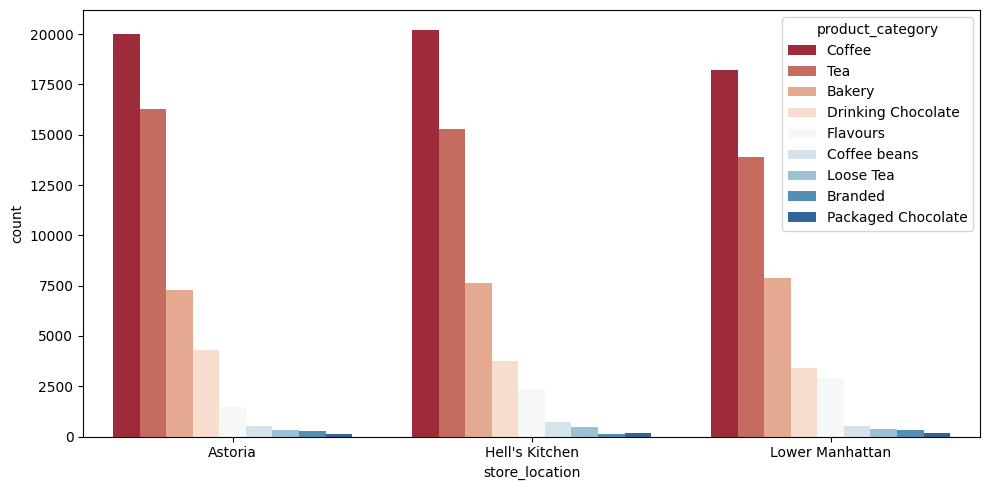

In [122]:
# Stores VS product categories

# Calculate number of product categories at each store location
popular_products = df.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot 
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

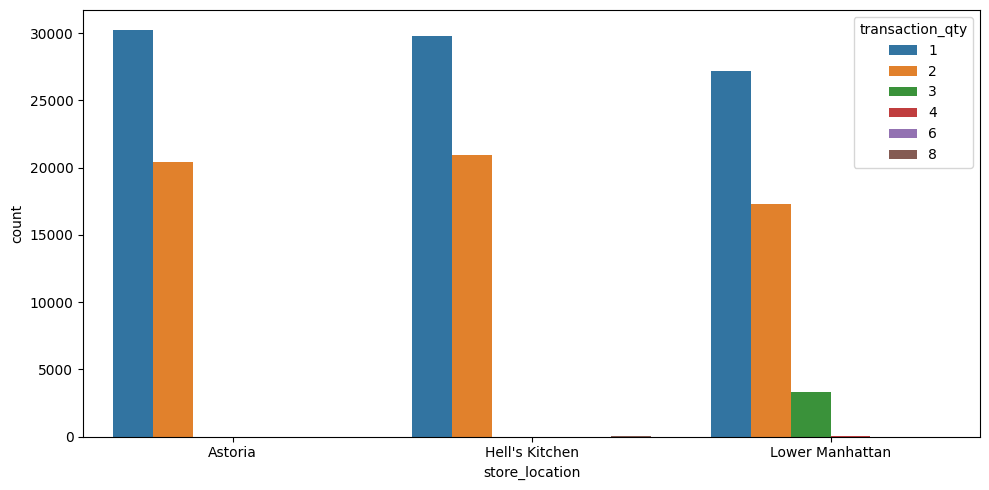

In [123]:
# Stores VS Most transaction_qty

# grouped 'store_location' and 'transaction_qty' as columns
grouped_data = df.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")

# set figure size
plt.figure(figsize=(10, 5))

# Create bar plot
sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data)

plt.tight_layout()
plt.show()

Astoria Store :
The most frequent transaction quantity observed is 1, with a count of 30,207 instances
The second most frequent transaction quantity is 2, noted 20,392 times
 

Hell's Kitchen Store:
The most frequent transaction quantity observed is 1, noted 29,793 times
The second most frequent transaction quantity is 2, observed 20,932 times
Additionally, there are 8 transactions with a quantity of 8
 

Lower Manhattan Store:
The most frequent transaction quantity observed is 1, recorded 27,159 times.
The second most frequent transaction quantity is 2, seen 17,318 times.
There are occurrences of transaction quantities 3, 4, and 6, but they are less frequent compared to quantities 1 and 2

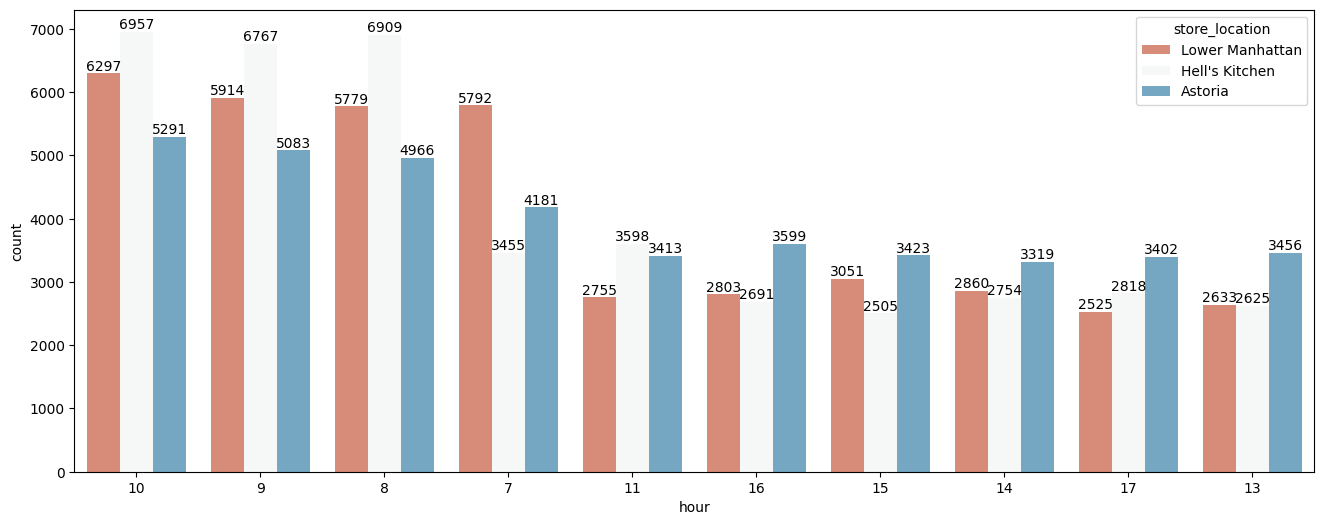

In [124]:
# Stores VS Hour sales

# set figure size
plt.figure(figsize=(16, 6))

# call function i create it in cell 12
count_plot(x_axis = "hour", hue = "store_location", top = 10)

Astoria Store :
Peak hours are from 9 AM to 10 AM, and from 4 PM to 5 PM, with counts ranging between 5,083 and 5,291 during these periods
The least busy hours are from 7 AM to 8 AM, with counts ranging between 4,181 and 4,966
 

Hell's Kitchen Store :
Busiest hours are from 8 AM to 10 AM, with counts ranging between 6,767 and 6,909
The least busy hours are from 6 AM to 7 AM and from 6 PM to 8 PM
 

Lower Manhattan Store :
Peak hours are from 9 AM to 10 AM, with a count of 6,297, and from 2 PM to 3 PM, with a count of 3,051
The least busy hours are from 7 PM to 8 PM, with counts dropping to 75 and 125

In [130]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime,year,month,day,hour,day_of_week,Month
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2023-01-01 07:06:11,2023,January,Sunday,7,Sunday,2023-01
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01-01 07:08:56,2023,January,Sunday,7,Sunday,2023-01
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,2023-01-01 07:14:04,2023,January,Sunday,7,Sunday,2023-01
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2023-01-01 07:20:24,2023,January,Sunday,7,Sunday,2023-01
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01-01 07:22:41,2023,January,Sunday,7,Sunday,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,0 days 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2023-06-30 20:18:41,2023,June,Friday,20,Friday,2023-06
149112,149453,2023-06-30,0 days 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2023-06-30 20:25:10,2023,June,Friday,20,Friday,2023-06
149113,149454,2023-06-30,0 days 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2023-06-30 20:31:34,2023,June,Friday,20,Friday,2023-06
149114,149455,2023-06-30,0 days 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,2023-06-30 20:57:19,2023,June,Friday,20,Friday,2023-06


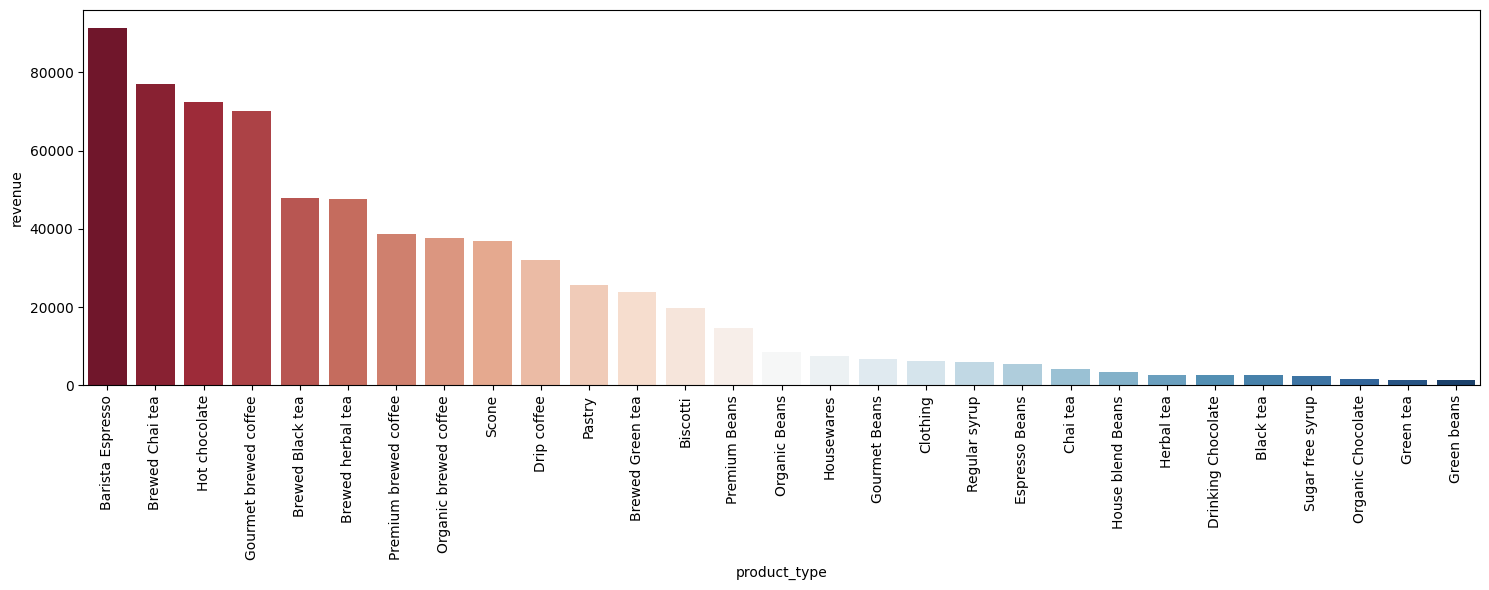

In [132]:
# Category VS Total revenue

# grouped product_type' and 'Total revenue'
category_revenue = df.groupby("product_type")["sales"].sum().reset_index(name = "revenue")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)

# set figure size
plt.figure(figsize = (15,6))
# create bar plot
sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

Top Revenue Product Types :
Barista Espresso with a revenue of 91,406.20
Brewed Chai tea with a revenue of 77,081.95
Hot chocolate with a revenue of 72,416.00
Gourmet brewed coffee with a revenue of 70,034.60
Brewed Black tea with a revenue of 47,932.00
 

Lowest Revenue Product Types :
Organic Chocolate with a revenue of 1,679.60
Green tea with a revenue of 1,470.75
Green beans with a revenue of 1,340.00
Other Observations :
Various products contribute to revenue across different ranges, with a mix of beverages (like teas, coffees) and snacks (biscotti, pastries).
Coffee-related products, such as various brews and espresso variants, hold prominent positions in revenue generation.
The lowest revenue-generating products are predominantly related to tea and specific beverage variants.

<div style="text-align: center; margin-top: 20px;">
  <a href="https://www.youtube.com/@datax_official" target="_blank">
    <img src="https://img.shields.io/badge/YouTube-FF0000?style=for-the-badge&logo=youtube&logoColor=white" alt="YouTube">
  </a>
  <a href="https://www.linkedin.com/company/datax-official" target="_blank">
    <img src="https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn">
  </a>
</div>

<div style="text-align: center; margin-top: 20px;">
  <p style="text-align: center; font-family:verdana;">All rights reserved to Data X</p>
</div>